# Proceso Iterativo para diferentes Modelos de Decisión

### Entorno virtual

In [15]:
# Crear el entorno virtual
!python -m venv myenv

# Activar el entorno virtual
!myenv\Scripts\activate

### Downloads

In [ ]:
# Instalar las dependencias necesarias
!myenv\Scripts\pip install -r requirements.txt

%pip install graphviz tabulate xgboost

  Using cached asttokens-3.0.0-py3-none-any.whl.metadata (4.7 kB)
  Using cached colorama-0.4.6-py2.py3-none-any.whl.metadata (17 kB)
  Using cached comm-0.2.2-py3-none-any.whl.metadata (3.7 kB)
  Using cached contourpy-1.3.1-cp312-cp312-win_amd64.whl.metadata (5.4 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached debugpy-1.8.12-cp312-cp312-win_amd64.whl.metadata (1.3 kB)
  Using cached ipykernel-6.29.5-py3-none-any.whl.metadata (6.3 kB)
  Using cached ipython-8.31.0-py3-none-any.whl.metadata (4.9 kB)
  Using cached jedi-0.19.2-py2.py3-none-any.whl.metadata (22 kB)
  Using cached jupyter_client-8.6.3-py3-none-any.whl.metadata (8.3 kB)
  Using cached matplotlib-3.10.0-cp312-cp312-win_amd64.whl.metadata (11 kB)
  Using cached pandas-2.2.3-cp312-cp312-win_amd64.whl.metadata (19 kB)
  Using cached scikit_learn-1.6.1-cp312-cp312-win_amd64.whl.metadata (15 kB)
  Using cached seaborn-0.13.2-py3-none-any.whl.metadata (5.4 kB)
  Using cached stack_data-0.6.3-py3

ERROR: Could not install packages due to an OSError: [Errno 2] No such file or directory: 'c:\\Users\\aleja\\OneDrive\\Documentos\\GitHub\\3r\\2n cuatri\\inteligencia artificial - jacinto y\\Ejemplo proceso iterativo\\Purchase-Propensity-Model\\myenv\\Lib\\site-packages\\jedi\\third_party\\django-stubs\\django-stubs\\contrib\\auth\\management\\commands\\changepassword.pyi'
HINT: This error might have occurred since this system does not have Windows Long Path support enabled. You can find information on how to enable this at https://pip.pypa.io/warnings/enable-long-paths


[notice] A new release of pip is available: 24.2 -> 25.0.1
[notice] To update, run: c:\Users\aleja\OneDrive\Documentos\GitHub\3r\2n cuatri\inteligencia artificial - jacinto y\Ejemplo proceso iterativo\Purchase-Propensity-Model\myenv\Scripts\python.exe -m pip install --upgrade pip



[notice] A new release of pip is available: 24.3.1 -> 25.0.1
[notice] To update, run: python.exe -m pip install --upgrade pip


### Librerias

In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from tabulate import tabulate
from itertools import product

# Modelos de Machine Learning
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.neural_network import MLPClassifier
from xgboost import XGBClassifier
import xgboost as xgb

# Preprocesamiento
from sklearn.preprocessing import LabelEncoder, OneHotEncoder

# Model Selection y Validación
from sklearn.model_selection import (
    train_test_split, cross_val_score, learning_curve, validation_curve
)

# Métricas
from sklearn.metrics import (
    accuracy_score, classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, precision_score, recall_score, f1_score
)


## Llamar a Azure y descargar fichero

Usar para el caso practico  en local exportando a CSV

In [18]:
# import pyodbc
# import pandas as pd

# # Configuración de conexión a Azure SQL con AAD
# SERVER = 'uaxmathfis.database.windows.net'
# DATABASE = 'usecases'
# DRIVER = '{ODBC Driver 18 for SQL Server}'

# # Usar autenticación interactiva de Azure Active Directory (abre una ventana de login)
# conn_str = f"DRIVER={DRIVER};SERVER={SERVER};DATABASE={DATABASE};Authentication=ActiveDirectoryInteractive"

# try:
#     conn = pyodbc.connect(conn_str)
#     sql_query = "SELECT * FROM [DATAEX].[IA_PROPENSITY_TRAIN]"
#     data = pd.read_sql(sql_query, conn)

#     print(data.head())
#     print(" Conexión exitosa con Azure SQL usando AAD (interactivo).")

#     # Ruta de exportación
#     csv_path = r"C:\Users\jvela\OneDrive - Universidad Alfonso X el Sabio\Docencia\IA\CASOS DE USO\propensity\data_export.csv"
    
#     # Exportar a CSV
#     data.to_csv(csv_path, index=False, encoding='utf-8-sig')
#     print(f" Datos exportados exitosamente a: {csv_path}")

# except Exception as e:
#     print(f" Error de conexión: {e}")

In [20]:
data = pd.read_csv(r'docs\Propensity.csv', delimiter=',')

display(data)

,CODE,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,...,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Mas_1_coche,Revisiones,Edad_Cliente,Tiempo
0,CLI1,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,M,Empresa,...,Medio-Bajo,NO DATA,Averia muy grave,SI,2892,0,False,2,18,0
1,CLI2,A,TIPO1,FUEL 1,Baja,M,Contado,CASADO,F,Empresa,...,Medio-Bajo,SI,No,NO,1376,7187,False,2,53,0
2,CLI3,A,TIPO1,FUEL 1,Baja,M,Otros,CASADO,M,Empresa,...,Medio,NO DATA,No,NO,1376,0,True,4,21,3
3,CLI4,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Empresa,...,Medio,SI,Averia muy grave,SI,2015,7256,True,4,48,5
4,CLI5,A,TIPO1,FUEL 1,Baja,M,Financiera Marca,CASADO,F,Funcionario,...,Alto,NO DATA,No,NO,1818,0,True,3,21,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
58044,CLI57905,F,TIPO3,FUEL 1,Alta,M,Contado,SOLTERO,F,Empresa,...,NaN,SI,Averia muy grave,SI,6832,12528,False,5,38,0
58045,CLI57926,K,TIPO7,FUEL 1,Alta,A,Contado,NaN,NaN,Empresa,...,Medio-Bajo,NO DATA,No,SI,0,22072,False,3,54,0
58046,CLI57952,K,TIPO7,FUEL 1,Alta,A,Contado,CASADO,M,Empresa,...,Medio,NO DATA,No,NO,0,8352,False,8,63,0
58047,CLI58038,G,TIPO5,FUEL 2,Media,M,Contado,CASADO,M,Empresa,...,Medio-Bajo,NO DATA,No,NO,2786,10441,False,13,62,0


In [25]:
data.dtypes

PRODUCTO           object
TIPO_CARROCERIA    object
COMBUSTIBLE        object
Potencia           object
TRANS              object
FORMA_PAGO         object
ESTADO_CIVIL       object
GENERO             object
OcupaciOn          object
PROVINCIA          object
Campanna1          object
Campanna2          object
Campanna3          object
Zona_Renta         object
REV_Garantia       object
Averia_grave       object
QUEJA_CAC          object
COSTE_VENTA         int64
km_anno             int64
Mas_1_coche          bool
Revisiones          int64
Edad_Cliente        int64
dtype: object

## Tratamiento información label encoders

In [22]:
# Dividir los datos en características (X) y etiquetas (y)
X = data.drop(['Mas_1_coche','Tiempo'], axis=1)
y = data['Mas_1_coche']

# Convertir características categóricas a numéricas
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

""""LabelEncoder convierte categorías en valores numéricos enteros (0,1,2,...).
 **Útil para variables ordinales (cuando hay un orden lógico entre categorías).
También se usa en y cuando la variable objetivo es categórica."""

# Manejar valores nulos (si existen) después de la conversión
X.fillna(0, inplace=True)

# Eliminar la columna 'Customer ID' si existe
if 'CODE' in data.columns:
    data.drop(['CODE','Tiempo'], axis=1, inplace=True)

# Obtener información del dataframe
print(data.head())
print(data.info())
# Obtener información del dataframe
print(X.info())
# Obtener información del dataframe
print(y.info())

  PRODUCTO TIPO_CARROCERIA COMBUSTIBLE Potencia TRANS        FORMA_PAGO  \
0        A           TIPO1      FUEL 1     Baja     M           Contado   
1        A           TIPO1      FUEL 1     Baja     M           Contado   
2        A           TIPO1      FUEL 1     Baja     M             Otros   
3        A           TIPO1      FUEL 1     Baja     M  Financiera Marca   
4        A           TIPO1      FUEL 1     Baja     M  Financiera Marca   

  ESTADO_CIVIL GENERO    OcupaciOn               PROVINCIA  ... Campanna3  \
0       CASADO      M      Empresa                Asturias  ...        NO   
1       CASADO      F      Empresa                  Toledo  ...        NO   
2       CASADO      M      Empresa                  Lerida  ...        NO   
3       CASADO      F      Empresa                  Madrid  ...        NO   
4       CASADO      F  Funcionario  Santa Cruz de Tenerife  ...        SI   

   Zona_Renta REV_Garantia      Averia_grave QUEJA_CAC COSTE_VENTA km_anno  \
0  Medio

# Decision Tree Classifier

### Onehot encoder + crear tabla de entrenamiento

In [23]:
# Codificar variables categóricas si es necesario
#categorical_columns = X.select_dtypes(include=['object']).columns
#encoder = OneHotEncoder()
#X_encoded = pd.DataFrame(encoder.fit_transform(X[categorical_columns]).toarray())
#X_encoded.columns = encoder.get_feature_names_out(categorical_columns)
#X = pd.concat([X.drop(columns=categorical_columns), X_encoded], axis=1)
"""OneHotEncoder convierte cada categoría en una columna binaria (0 o 1).
Útil para variables nominales (sin orden entre categorías).
Se recomienda si hay muchas categorías para evitar interpretaciones incorrectas."""""

# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Convertir y_train a formato numérico
y_train = y_train.astype(int)

# Convertir y_test a formato numérico
y_test = y_test.astype(int)



## Iteración del modelo

Criterion: gini, Splitter: best, Max Depth: 3, Min Samples Split: 2, Min Samples Leaf: 1
Accuracy: 0.7933677863910422, F1 Score: 0.7979961577662463, Recall: 0.7933677863910422, ROC-AUC: 0.8192628081819413, CV Score: 0.7897457194988002, Train Score: 0.7906716337561102, Overfitting: OK
Criterion: gini, Splitter: best, Max Depth: 3, Min Samples Split: 2, Min Samples Leaf: 2
Accuracy: 0.7933677863910422, F1 Score: 0.7979961577662463, Recall: 0.7933677863910422, ROC-AUC: 0.8192628081819413, CV Score: 0.7897457194988002, Train Score: 0.7906716337561102, Overfitting: OK
Criterion: gini, Splitter: best, Max Depth: 3, Min Samples Split: 2, Min Samples Leaf: 5
Accuracy: 0.7933677863910422, F1 Score: 0.7979961577662463, Recall: 0.7933677863910422, ROC-AUC: 0.8192628081819413, CV Score: 0.7897457194988002, Train Score: 0.7906716337561102, Overfitting: OK
Criterion: gini, Splitter: best, Max Depth: 3, Min Samples Split: 5, Min Samples Leaf: 1
Accuracy: 0.7933677863910422, F1 Score: 0.79799615776624

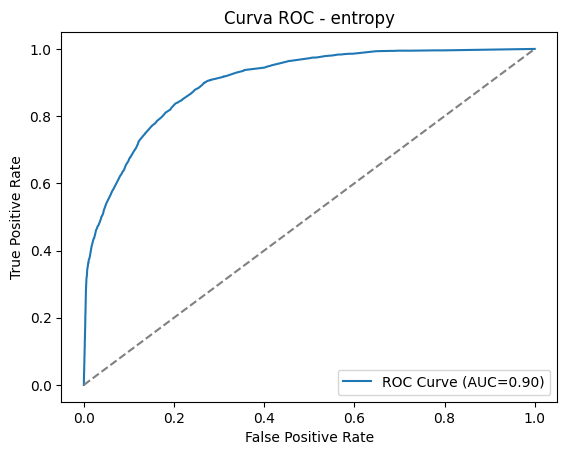

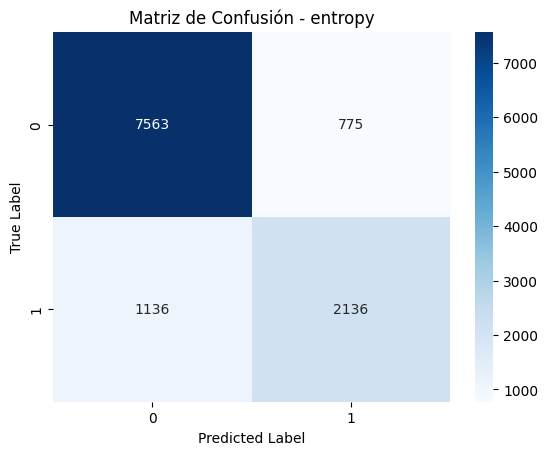

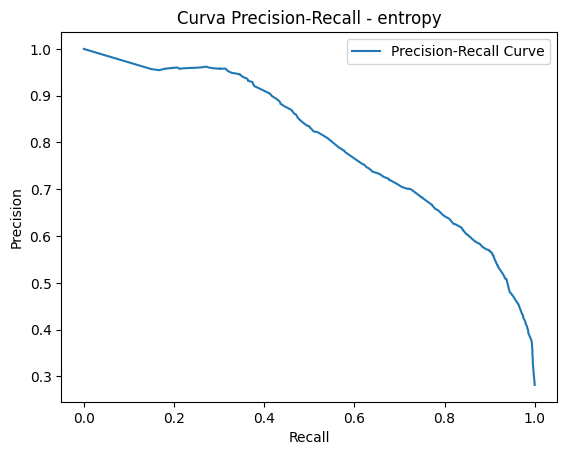


--------------------------------------------------
Modelo Optimizado 134
--------------------------------------------------
Criterion: log_loss, Splitter: best, Max Depth: 10, Min Samples Split: 10, Min Samples Leaf: 2

Classification Report for log_loss - best:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      8338
           1       0.73      0.65      0.69      3272

    accuracy                           0.84     11610
   macro avg       0.80      0.78      0.79     11610
weighted avg       0.83      0.84      0.83     11610


ROC-AUC Score: 0.9009749161496456



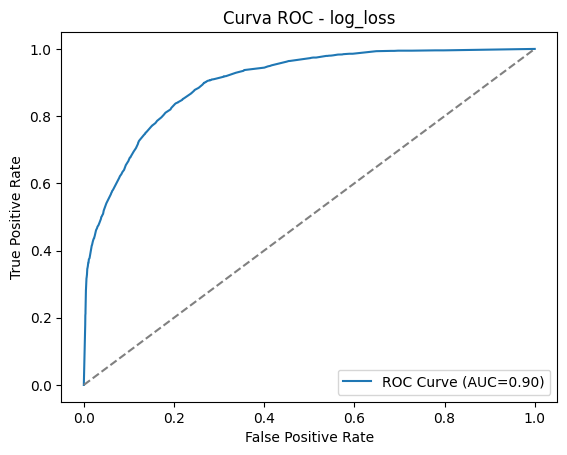

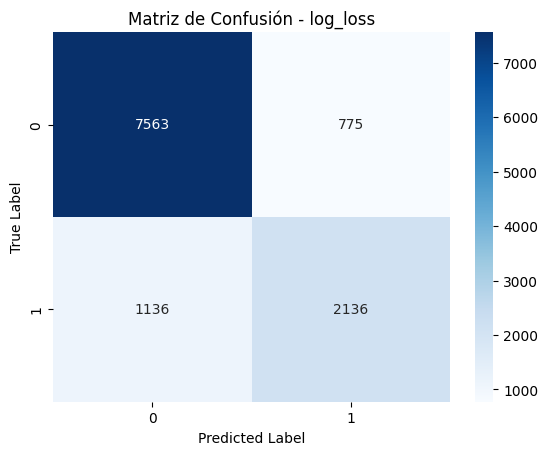

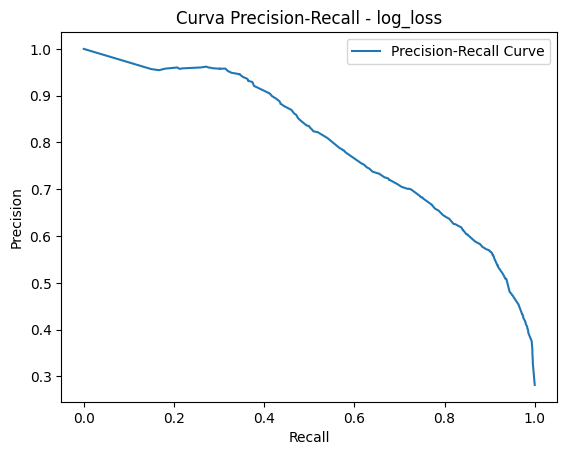


--------------------------------------------------
Modelo Optimizado 79
--------------------------------------------------
Criterion: entropy, Splitter: best, Max Depth: 10, Min Samples Split: 10, Min Samples Leaf: 1

Classification Report for entropy - best:
              precision    recall  f1-score   support

           0       0.87      0.91      0.89      8338
           1       0.73      0.65      0.69      3272

    accuracy                           0.84     11610
   macro avg       0.80      0.78      0.79     11610
weighted avg       0.83      0.84      0.83     11610


ROC-AUC Score: 0.9009749161496456



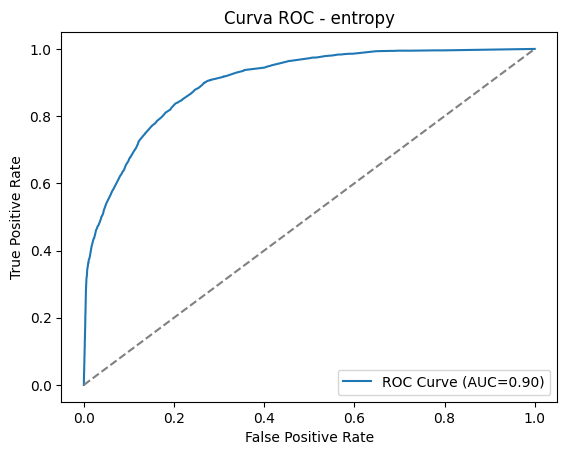

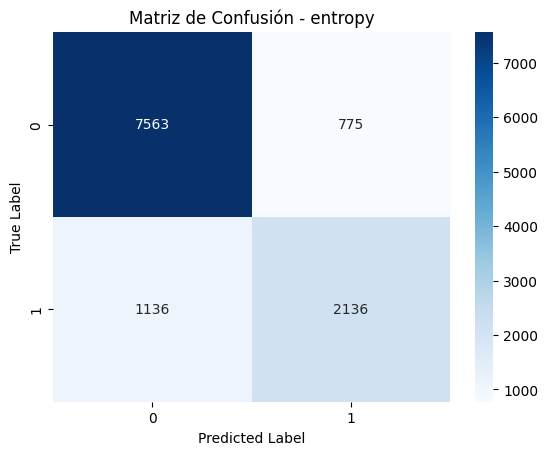

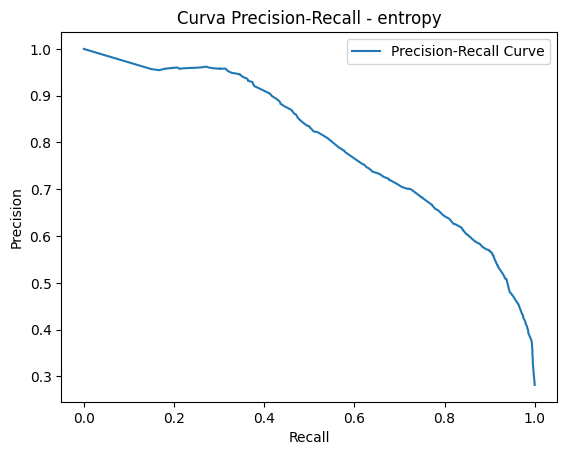

,criterion,splitter,max_depth,min_samples_split,min_samples_leaf,accuracy,f1_score,recall,roc_auc,cv_score,train_score,overfitting
79,entropy,best,10,10,2,0.852024,0.851928,0.852024,0.924196,0.847628,0.866255,OK
133,log_loss,best,10,10,2,0.852024,0.851928,0.852024,0.924196,0.847628,0.866255,OK
78,entropy,best,10,10,1,0.851938,0.851834,0.851938,0.922959,0.847800,0.866513,OK


In [24]:


# Definir hiperparámetros a iterar
param_grid = {
    'criterion': ['gini', 'entropy', 'log_loss'],
    'splitter': ['best', 'random'],
    'max_depth': [ 3, 5, 10],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 5]
}
"""splitter="best" (por defecto)
Encuentra el mejor punto de división en cada nodo, basado en la métrica de evaluación (criterion).
Tiende a crear árboles más profundos, porque optimiza cada división localmente.
Útil para conjuntos de datos pequeños.
splitter="random". En lugar de buscar el mejor punto de división, elige un punto de división de manera aleatoria 
entre los mejores candidatos.
Puede generar árboles más pequeños y con menos sobreajuste.
Útil para conjuntos de datos grandes o cuando se usa en bagging/random forests.
----------------------------------------------------
Define el número mínimo de muestras necesarias para dividir un nodo.
Si min_samples_split=2, cualquier nodo con 2 o más muestras puede dividirse.
Si min_samples_split=10, un nodo necesita al menos 10 muestras para dividirse.
Valores bajos (2-5) → Árbol más profundo y detallado, mayor riesgo de sobreajuste.
Valores altos (10-20) → Árbol más generalizado, menor sobreajuste.
------------------------------------------------------
Define el número mínimo de muestras necesarias en una hoja (nodo final).
Si min_samples_leaf=1, el árbol puede crear nodos con solo 1 muestra.
Si min_samples_leaf=5, cada hoja debe tener al menos 5 muestras.
Valores bajos (1-3) → Árbol más detallado, mayor riesgo de sobreajuste.
Valores altos (5-10) → Árbol más pequeño y estable, menos sobreajuste.
"""


# Almacenar resultados
results = []

# Iterar sobre todas las combinaciones de hiperparámetros
for params in product(*param_grid.values()):
    criterion, splitter, max_depth, min_samples_split, min_samples_leaf = params
    
    """Este código es un bucle for que recorre todas las combinaciones posibles de hiperparámetros usando 
    itertools.product. Es una técnica común para realizar búsqueda exhaustiva (grid search) en modelos de machine 
    learning.  Genera todas las combinaciones de valores de param_grid.
    param_grid.values() obtiene las listas de valores de cada hiperparámetro.
    *param_grid.values() descomprime los valores dentro de product().
    product(*param_grid.values()) devuelve todas las combinaciones posibles de hiperparámetros."""   

    # Construir el modelo con los hiperparámetros actuales
    model = DecisionTreeClassifier(
        criterion=criterion, 
        splitter=splitter, 
        max_depth=max_depth, 
        min_samples_split=min_samples_split, 
        min_samples_leaf=min_samples_leaf,
        random_state=42
    )
    
    # Entrenar el modelo
    model.fit(X_train, y_train)
    
    # Predecir en el conjunto de prueba
    y_pred = model.predict(X_test)
    
    # Calcular métricas
    accuracy = accuracy_score(y_test, y_pred)
    f1 = f1_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    cm = confusion_matrix(y_test, y_pred)
    report = classification_report(y_test, y_pred)
    
    # Calcular ROC-AUC si hay más de una clase
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
    else:
        roc_auc = None
    
    # Validación cruzada
    cv_scores = cross_val_score(model, X_train, y_train, cv=5)
    mean_cv_score = np.mean(cv_scores)
    
    # Calcular Train Score
    train_score = model.score(X_train, y_train)
    
    # Determinar si hay sobreajuste
    if train_score > 1.5 * mean_cv_score:
     overfitting_warning = "SEVERE OVERFITTING"
    elif train_score > 1.2 * mean_cv_score:
     overfitting_warning = "DANGER"
    elif train_score > 1.1 * mean_cv_score:
     overfitting_warning = "MILD OVERFITTING"
    else:
     overfitting_warning = "OK"
    """Esta línea de código verifica si hay sobreajuste (overfitting) comparando el rendimiento en entrenamiento 
    (train_score) con el rendimiento promedio en validación (mean_cv_score). Si el modelo tiene un rendimiento 
    muy alto en entrenamiento, pero mucho menor en validación, significa que está memorizando los datos 
    de entrenamiento en lugar de generalizar bien. Se usa un umbral del 20% (1.2 * mean_cv_score) para marcar 
    la diferencia como sospechosa."""
    
    # Guardar los resultados
    results.append({
        'criterion': criterion,
        'splitter': splitter,
        'max_depth': int(max_depth) if pd.notna(max_depth) else None,
        'min_samples_split': min_samples_split,
        'min_samples_leaf': min_samples_leaf,
        'accuracy': accuracy,
        'f1_score': f1,
        'recall': recall,
        'roc_auc': roc_auc,
        'cv_score': mean_cv_score,
        'train_score': train_score,
        'overfitting': overfitting_warning
    })

# Imprimir resultados parciales
    print(f"Criterion: {criterion}, Splitter: {splitter}, Max Depth: {max_depth}, Min Samples Split: {min_samples_split}, Min Samples Leaf: {min_samples_leaf}")
    print(f"Accuracy: {accuracy}, F1 Score: {f1}, Recall: {recall}, ROC-AUC: {roc_auc}, CV Score: {mean_cv_score}, Train Score: {train_score}, Overfitting: {overfitting_warning}")

# Convertir resultados a DataFrame y seleccionar los 3 mejores modelos
results_df = pd.DataFrame(results)
results_df = results_df.sort_values(by=['f1_score', 'accuracy'], ascending=False)

# Seleccionar el mejor modelo sin sobreajuste y optimizando F1 Score
best_models = results_df[results_df['overfitting'] == 'OK'].head(3)

for index, row in best_models.iterrows():
    print('\n' + '-' * 50)
    print(f'Modelo Optimizado {index + 1}')
    print('-' * 50)
    print(f'Criterion: {row["criterion"]}, Splitter: {row["splitter"]}, Max Depth: {row["max_depth"]}, Min Samples Split: {row["min_samples_split"]}, Min Samples Leaf: {row["min_samples_leaf"]}')
    print(f'\nClassification Report for {row["criterion"]} - {row["splitter"]}:')
    y_pred = model.predict(X_test)
    print(classification_report(y_test, y_pred))
    
    if len(np.unique(y_test)) > 1:
        y_pred_proba = model.predict_proba(X_test)[:, 1]
        roc_auc = roc_auc_score(y_test, y_pred_proba)
        print(f'\nROC-AUC Score: {roc_auc}\n')
        
        # Curva ROC
        fpr, tpr, _ = roc_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
        plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'Curva ROC - {row["criterion"]}')
        plt.legend()
        plt.show()
        
        # Matriz de confusión
        plt.figure()
        sns.heatmap(confusion_matrix(y_test, y_pred), annot=True, fmt='d', cmap='Blues')
        plt.xlabel('Predicted Label')
        plt.ylabel('True Label')
        plt.title(f'Matriz de Confusión - {row["criterion"]}')
        plt.show()
        
        # Curva Precision-Recall
        precision, recall, _ = precision_recall_curve(y_test, y_pred_proba)
        plt.figure()
        plt.plot(recall, precision, label='Precision-Recall Curve')
        plt.xlabel('Recall')
        plt.ylabel('Precision')
        plt.title(f'Curva Precision-Recall - {row["criterion"]}')
        plt.legend()
        plt.show()

# Mostrar los mejores modelos
from IPython.display import display
display(best_models)


# Gaussian Naive Bayes

El **Naive Bayes** es una familia de algoritmos de clasificación basados en el teorema de Bayes, y existen diferentes variantes adaptadas a distintos tipos de datos. Aunque comparten la misma estructura básica, cada variante está optimizada para diferentes tipos de distribuciones de características. Estas son las principales variaciones:
- **GaussianNB**: Ideal para variables **continuas** con distribución **normal**.
- **MultinomialNB**: Mejor para **conteos discretos** (como en **clasificación de texto**).
- **BernoulliNB**: Utilizado cuando las características son **binarias** (p.ej., presencia/ausencia de palabras).


### **Comparacion con  Decision Tree:**

| **Modelo**                 | **Características**                                                                                                               | **Casos donde es mejor**                                                                                                                                             | **Por qué elegirlo**                                                                                  |
|----------------------------|-----------------------------------------------------------------------------------------------------------------------------------|---------------------------------------------------------------------------------------------------------------------------------------------------------------------|------------------------------------------------------------------------------------------------------|
| **Decision Tree**           | - Sensible a los hiperparámetros (e.g., `criterion`, `max_depth`).<br>- Puede sobreajustarse con valores pequeños de `min_samples_split`. | - Datos con relaciones no lineales complejas.<br>- Modelado de variables categóricas.<br>- Alta interpretabilidad (visualización clara del modelo).                  | - Útil para relaciones complejas entre características.<br>- Ideal cuando se necesita interpretar el modelo.|
| **Gaussian Naive Bayes**    | - Basado en el teorema de Bayes.<br>- Asume independencia entre características.<br>- Hiperparámetro principal: `var_smoothing`.         | - Grandes volúmenes de datos.<br>- Características casi independientes.<br>- Clasificación rápida y eficiente.<br>- Datos balanceados.                             | - Rápido y eficiente.<br>- No requiere ajuste exhaustivo de hiperparámetros.<br>- Bueno para clasificación simple.|



## Preprocesamiento de los datos

In [27]:
print(data.columns)


Index(['PRODUCTO', 'TIPO_CARROCERIA', 'COMBUSTIBLE', 'Potencia', 'TRANS',
       'FORMA_PAGO', 'ESTADO_CIVIL', 'GENERO', 'OcupaciOn', 'PROVINCIA',
       'Campanna1', 'Campanna2', 'Campanna3', 'Zona_Renta', 'REV_Garantia',
       'Averia_grave', 'QUEJA_CAC', 'COSTE_VENTA', 'km_anno', 'Mas_1_coche',
       'Revisiones', 'Edad_Cliente'],
      dtype='object')


In [28]:
# Dividir los datos en características (X) y etiquetas (y)
X = data.drop(['Mas_1_coche'], axis=1)
y = data['Mas_1_coche']

# Codificar las variables categóricas a números
label_encoders = {}
for column in X.select_dtypes(include=['object']).columns:
    label_encoders[column] = LabelEncoder()
    X[column] = label_encoders[column].fit_transform(X[column])

# Revisar los primeros datos procesados
X.head()

,PRODUCTO,TIPO_CARROCERIA,COMBUSTIBLE,Potencia,TRANS,FORMA_PAGO,ESTADO_CIVIL,GENERO,OcupaciOn,PROVINCIA,...,Campanna2,Campanna3,Zona_Renta,REV_Garantia,Averia_grave,QUEJA_CAC,COSTE_VENTA,km_anno,Revisiones,Edad_Cliente
0,0,0,0,1,1,0,0,1,1,4,...,0,0,2,0,2,1,2892,0,2,18
1,0,0,0,1,1,0,0,0,1,47,...,0,0,2,1,3,0,1376,7187,2,53
2,0,0,0,1,1,3,0,1,1,30,...,0,0,1,0,3,0,1376,0,4,21
3,0,0,0,1,1,2,0,0,1,32,...,0,0,1,1,2,1,2015,7256,4,48
4,0,0,0,1,1,2,0,0,2,41,...,0,1,0,0,3,0,1818,0,3,21


## Dividir los datos en entrenamiento y prueba

In [29]:
# Dividir los datos en conjunto de entrenamiento y prueba
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

## Entrenamiento del modelo Naive Bayes

In [30]:
# Crear el modelo de Naive Bayes
model_nb = GaussianNB()

# Entrenar el modelo
model_nb.fit(X_train, y_train)

# Realizar predicciones
y_pred_nb = model_nb.predict(X_test)

## Evaluación del modelo

Accuracy:  0.7507321274763136

Classification Report:
               precision    recall  f1-score   support

       False       0.78      0.90      0.84      8338
        True       0.60      0.36      0.45      3272

    accuracy                           0.75     11610
   macro avg       0.69      0.63      0.64     11610
weighted avg       0.73      0.75      0.73     11610



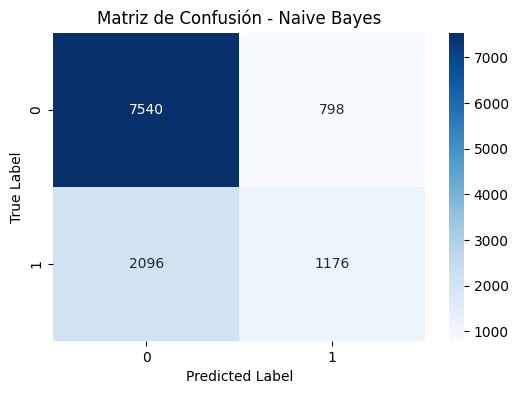

ROC-AUC Score: 0.7629334663053238


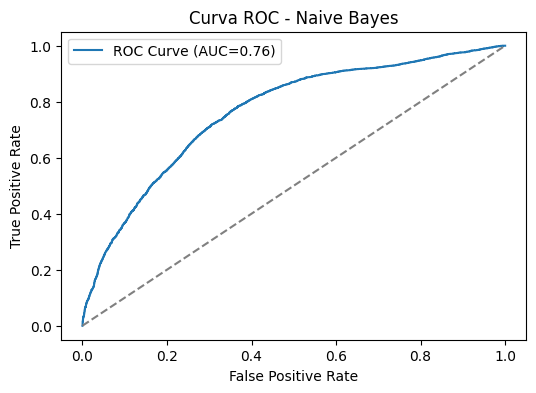

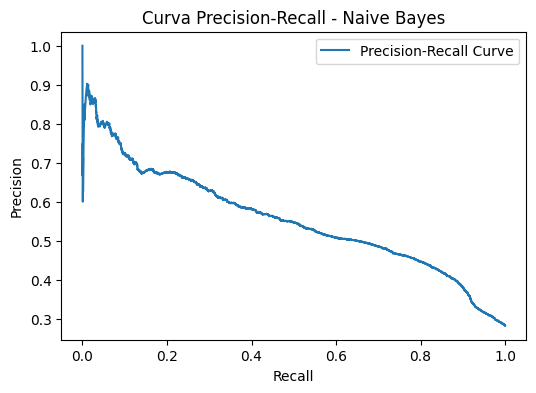

In [32]:
# Métricas de evaluación
print("Accuracy: ", accuracy_score(y_test, y_pred_nb))
print("\nClassification Report:\n", classification_report(y_test, y_pred_nb))

# Matriz de confusión
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_nb), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()

# Calcular ROC-AUC
y_pred_proba_nb = model_nb.predict_proba(X_test)[:, 1]
roc_auc = roc_auc_score(y_test, y_pred_proba_nb)
print(f"ROC-AUC Score: {roc_auc}")

# Curva ROC
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_nb)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Naive Bayes')
plt.legend()
plt.show()

# Obtener las probabilidades de la clase positiva
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_nb)

# Graficar la curva Precision-Recall
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Naive Bayes')
plt.legend()
plt.show()

### Ajuste en el threshold para aumentar los falsos positivos y disminuir los falsos negativos

Accuracy:  0.7126614987080103

Classification Report:
               precision    recall  f1-score   support

       False       0.85      0.73      0.78      8338
        True       0.49      0.68      0.57      3272

    accuracy                           0.71     11610
   macro avg       0.67      0.70      0.68     11610
weighted avg       0.75      0.71      0.72     11610



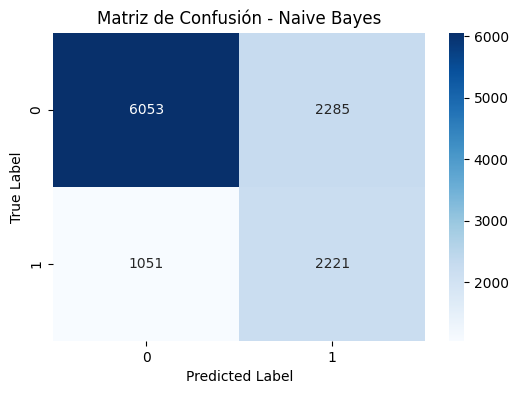

ROC-AUC Score: 0.7629334663053238


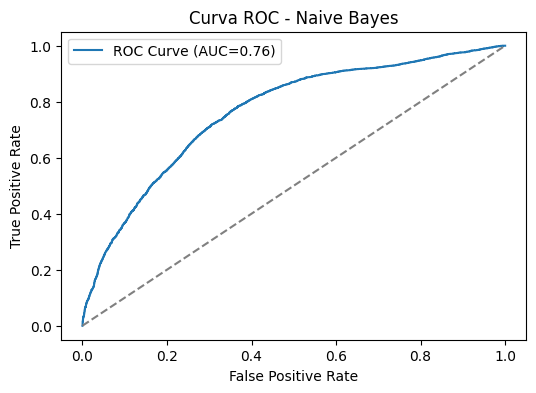

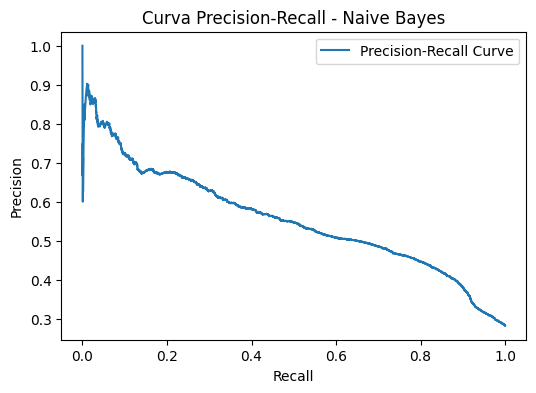

In [33]:
# Obtener las probabilidades de la clase positiva
y_pred_proba_nb = model_nb.predict_proba(X_test)[:, 1]

# Definir un umbral más bajo (por ejemplo, 0.3 en lugar de 0.5)
threshold = 0.3
y_pred_adjusted = (y_pred_proba_nb >= threshold).astype(int)

# Métricas de evaluación con el umbral ajustado
print("Accuracy: ", accuracy_score(y_test, y_pred_adjusted))
print("\nClassification Report:\n", classification_report(y_test, y_pred_adjusted))

# Matriz de confusión con el nuevo umbral
plt.figure(figsize=(6, 4))
sns.heatmap(confusion_matrix(y_test, y_pred_adjusted), annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Matriz de Confusión - Naive Bayes')
plt.show()

# Calcular ROC-AUC con el nuevo umbral
roc_auc = roc_auc_score(y_test, y_pred_proba_nb)
print(f"ROC-AUC Score: {roc_auc}")

# Curva ROC con el nuevo umbral
fpr, tpr, _ = roc_curve(y_test, y_pred_proba_nb)
plt.figure(figsize=(6, 4))
plt.plot(fpr, tpr, label=f"ROC Curve (AUC={roc_auc:.2f})")
plt.plot([0, 1], [0, 1], linestyle='--', color='gray')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Curva ROC - Naive Bayes')
plt.legend()
plt.show()

# Obtener las probabilidades de la clase positiva
precision, recall, _ = precision_recall_curve(y_test, y_pred_proba_nb)

# Graficar la curva Precision-Recall con el nuevo umbral
plt.figure(figsize=(6, 4))
plt.plot(recall, precision, label='Precision-Recall Curve')
plt.xlabel('Recall')
plt.ylabel('Precision')
plt.title('Curva Precision-Recall - Naive Bayes')
plt.legend()
plt.show()


| **Métrica**        | **Significado**                                                                                               | **Clase "False"** (No tiene más de un coche) | **Clase "True"** (Tiene más de un coche) | **Promedio**       |
|--------------------|-------------------------------------------------------------------------------------------------------------|---------------------------------------------|----------------------------------------|--------------------|
| **Precision**      | Mide la exactitud de las predicciones positivas. Es decir, de todas las predicciones como positivas, ¿cuántas fueron correctas? | 0.85                                        | 0.49                                   | 0.67 (Macro avg)   |
| **Recall**         | Mide la capacidad del modelo para encontrar todas las instancias positivas. Es decir, ¿cuántos de los positivos reales fueron identificados? | 0.73                                        | 0.68                                   | 0.70 (Macro avg)   |
| **F1-Score**       | Es la media armónica entre **precision** y **recall**. Proporciona un balance entre ambas, especialmente útil cuando hay desbalance entre clases. | 0.78                                        | 0.57                                   | 0.68 (Macro avg)   |
| **Accuracy**       | Mide el porcentaje de predicciones correctas en total (verdaderos positivos y negativos sobre el total de predicciones). | -                                           | -                                      | 0.71               |
| **Weighted avg**   | Promedia las métricas de **precision**, **recall** y **f1-score** ponderadas por el número de instancias de cada clase. | -                                           | -                                      | 0.75 (Precision), 0.71 (Recall), 0.72 (F1) |

### Resumen:
- **Precision**: En la clase "False", **el modelo tiene alta precisión** (85%), lo que significa que cuando el modelo predice que un cliente no tiene más de un coche, lo hace correctamente el 85% de las veces. Sin embargo, en la clase "True", **la precisión es baja** (49%), lo que significa que el modelo está prediciendo muchos **falsos positivos** (clientes que no tienen más de un coche, pero el modelo los predice como que sí).
  
- **Recall**: El **recall en la clase "True"** (68%) es relativamente bueno, lo que indica que el modelo está identificando una buena parte de los clientes que realmente tienen más de un coche. El **recall en la clase "False"** (73%) también es moderado, lo que sugiere que el modelo está razonablemente bien en identificar a los clientes que no tienen más de un coche.

- **F1-Score**: El **F1-Score** para la clase "True" es bajo (0.57), lo que refleja un **desequilibrio entre precisión y recall**, lo que puede significar que el modelo necesita mejoras para detectar mejor a los clientes con más de un coche.

- **Accuracy**: La **exactitud general** (0.71) muestra que el modelo tiene una tasa de aciertos del **71%**. Sin embargo, dado que las clases pueden estar desbalanceadas, este número no es siempre el mejor indicador de desempeño.

### **Mejoras posibles**:
El modelo necesita **mejorar la precisión en la clase "True"** (clientes con más de un coche). Esto podría lograrse ajustando el **umbral de decisión** para hacer al modelo más sensible a la clase positiva, o utilizando técnicas de **reequilibrado de clases** como **SMOTE** o **undersampling**.


# KNN: KNeighbors Classifier.